# Twitter Sentiment Analysis
Ming Fong

Linguistics 55AC

Useful: https://medium.com/swlh/coronavirus-python-tutorial-1-520cc960aac1

In [50]:
!pip install wordcloud

In [60]:
import tweepy #https://github.com/tweepy/tweepy
import csv
from secrets import *
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
consumer_key = api_key
consumer_secret = api_secret
access_key = access_token
access_secret = access_secret

In [74]:
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name, count = 200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print(f"getting tweets before {oldest}")
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name, count=200, max_id = oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print(f"...{len(alltweets)} tweets downloaded so far")
    
    #transform the tweepy tweets into a 2D array that will populate the csv 
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]
    
    #write the csv  
    # with open(f'data/{screen_name}_tweets.csv', 'w') as f:
    #     writer = csv.writer(f)
    #     writer.writerow(["id","created_at","text"])
    #     writer.writerows(outtweets)
    
    return outtweets


In [110]:
data = pd.DataFrame(get_all_tweets("realDonaldTrump"))

getting tweets before 1335057724485275655
...400 tweets downloaded so far
getting tweets before 1332317341359742977
...599 tweets downloaded so far
getting tweets before 1329398991554015231
...798 tweets downloaded so far
getting tweets before 1327370955577057288
...997 tweets downloaded so far
getting tweets before 1324613181466173439
...1197 tweets downloaded so far
getting tweets before 1322749130956046335
...1397 tweets downloaded so far
getting tweets before 1321465092022497279
...1597 tweets downloaded so far
getting tweets before 1320225888211001343
...1797 tweets downloaded so far
getting tweets before 1318301849666134020
...1995 tweets downloaded so far
getting tweets before 1316712445990309887
...2193 tweets downloaded so far
getting tweets before 1315666003884421120
...2392 tweets downloaded so far
getting tweets before 1313848232716521472
...2590 tweets downloaded so far
getting tweets before 1311776453717942271
...2590 tweets downloaded so far


In [111]:
df = data.copy()
df.columns = ["id", "date", "text"]
# Remove links
df["text"] = [re.sub(r'https?://\S+', '', str(x)) for x in df["text"]]
# Remove Retweets
df = df[~df["text"].str.startswith("RT @")]
df["text"] = df["text"].replace("", np.nan)
df = df.dropna(subset = ["text"])

# Remove non alphanumeric characters
# df["text"] = [" ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", x).split()) for x in df["text"]]

In [112]:
# Sentiment score for each tweet
df["sentiment"] = [TextBlob(text).sentiment.polarity for text in df["text"]]

In [113]:
post_election = df[df["date"] >= "2020-11-3"]
pre_election = df[df["date"] < "2020-11-3"]

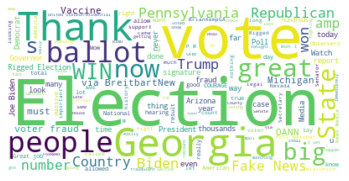

In [106]:
stopwords = set(STOPWORDS)
stopwords.update(["will"])

# Post-election wordcloud
post_wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(" ".join(post_election["text"].tolist()))
post_wordcloud.to_file("images/post_wordcloud.png")

plt.imshow(post_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

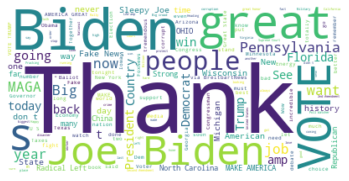

In [107]:
# Pre-election wordcloud
pre_wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(" ".join(pre_election["text"].tolist()))
pre_wordcloud.to_file("images/pre_wordcloud.png")

plt.imshow(pre_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()